In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

df = pd.read_csv('kc_house_data.csv')
df.sample(frac=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6566,8682290670,20150406T000000,745000.0,2,2.50,2170,7546,1.0,0,0,...,8,2170,0,2007,0,98053,47.7242,-122.032,2170,7083
10893,9407100310,20141113T000000,312620.0,3,2.50,1260,11877,1.0,0,0,...,7,1260,0,1975,0,98045,47.4442,-121.762,1430,9790
12922,1938400410,20150310T000000,275000.0,3,1.75,1650,7700,1.0,0,0,...,8,1650,0,1977,0,98023,47.3155,-122.365,2020,7700
17779,9285800180,20140626T000000,900000.0,4,3.50,3370,5000,2.0,0,2,...,8,2470,900,2008,0,98126,47.5714,-122.380,1820,5000
19999,3566800485,20150223T000000,649950.0,4,3.50,2440,3012,3.0,0,1,...,8,2440,0,2005,0,98117,47.6923,-122.392,1860,4650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,5680000260,20150512T000000,385000.0,3,1.00,810,4600,1.0,0,0,...,6,810,0,1918,0,98144,47.5712,-122.316,1520,4800
5039,3224800010,20141112T000000,235000.0,3,1.50,1660,8738,1.0,0,0,...,7,1080,580,1959,0,98002,47.3117,-122.208,1500,8466
7617,1823059106,20150428T000000,288250.0,3,1.75,2110,15400,1.0,0,0,...,7,1380,730,1963,0,98178,47.4861,-122.226,2110,9800
16336,1214000050,20141020T000000,350000.0,3,1.75,2130,7500,1.0,0,0,...,7,1090,1040,1956,0,98166,47.4593,-122.343,1590,7500


In [127]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [129]:
y = df['yr_renovated'].min()
y
print(np.where(df == y))

(array([    0,     0,     0, ..., 21612, 21612, 21612]), array([ 8,  9, 13, ...,  9, 13, 15]))


In [130]:
cm = df.corr()['price']
cm

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [131]:
#drop_cols = ['sqft_basement', 'floors', 'waterfront', 'yr_renovated', 'yr_built', 'condition', 'sqft_lot', 'zipcode', 'id', 'date', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade']
#drop_cols = ['sqft_above', 'bathrooms', 'bedrooms', 'floors', 'yr_built', 'condition', 'sqft_basement', 'view', 'waterfront', 'yr_renovated', 'zipcode', 'id', 'date', 'lat', 'long', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'grade']

drop_cols = ['date', 'id', 'zipcode']

df = df.drop(columns = drop_cols, axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [132]:
df = df[(df != 0).all(1)]

In [133]:
cm = df.corr()['price']
cm

price            1.000000
bedrooms         0.510686
bathrooms        0.647629
sqft_living      0.889152
sqft_lot        -0.136980
floors           0.100795
waterfront            NaN
view            -0.463724
condition       -0.042507
grade            0.735270
sqft_above       0.838042
sqft_basement    0.644939
yr_built         0.171254
yr_renovated     0.386541
lat              0.492924
long             0.521599
sqft_living15    0.646664
sqft_lot15      -0.221162
Name: price, dtype: float64

In [134]:
label = df['price']
feat = df.drop(columns = ['price'], axis = 1)

In [135]:
LinReg = LinearRegression(normalize = True)

In [136]:
LinReg.fit(feat, label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [137]:
print(LinReg.score(feat, label))

0.9640764429160597


In [139]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1.827275e+06,3.384615,2.923077,3636.384615,26917.884615,1.538462,1.0,3.769231,3.346154,8.730769,2517.076923,1119.307692,1943.769231,1989.615385,47.526119,-122.291154,2786.923077,26818.538462
std,1.483731e+06,1.022817,1.176370,2005.230921,22014.824880,0.467399,0.0,0.514408,0.561591,1.313246,1394.191864,952.901076,20.735106,10.998461,0.131322,0.095919,713.076541,36088.984793
min,4.000000e+05,2.000000,0.750000,1450.000000,8112.000000,1.000000,1.0,2.000000,3.000000,7.000000,1040.000000,100.000000,1915.000000,1962.000000,47.327600,-122.511000,1200.000000,6389.000000
25%,1.021250e+06,3.000000,2.312500,2745.000000,12590.250000,1.000000,1.0,4.000000,3.000000,8.000000,1592.500000,532.500000,1930.250000,1984.250000,47.405450,-122.361750,2282.500000,11479.250000
50%,1.369950e+06,3.000000,2.750000,3125.000000,18490.000000,1.500000,1.0,4.000000,3.000000,8.500000,2135.000000,890.000000,1940.500000,1989.500000,47.543050,-122.284000,2785.000000,15251.500000
75%,2.012500e+06,4.000000,3.250000,3742.000000,37859.750000,2.000000,1.0,4.000000,4.000000,9.000000,3057.500000,1437.500000,1957.500000,1996.750000,47.604350,-122.214000,3237.500000,29847.750000
max,7.062500e+06,6.000000,6.750000,10040.000000,107386.000000,2.000000,1.0,4.000000,5.000000,12.000000,7680.000000,4820.000000,1983.000000,2009.000000,47.726500,-122.110000,3930.000000,192268.000000


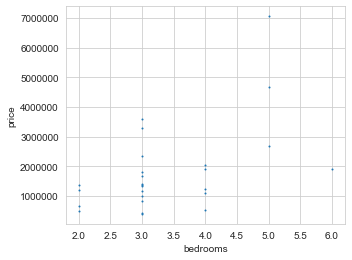

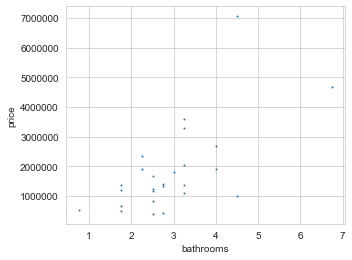

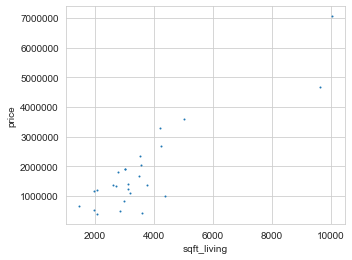

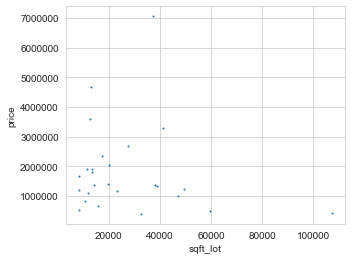

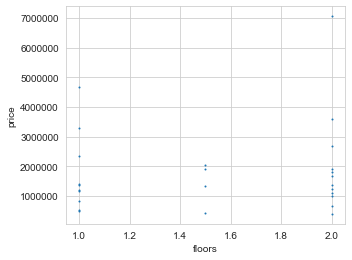

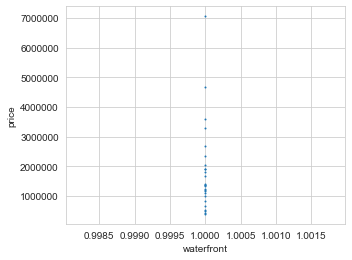

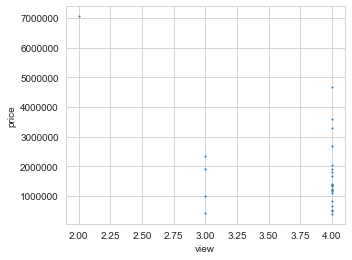

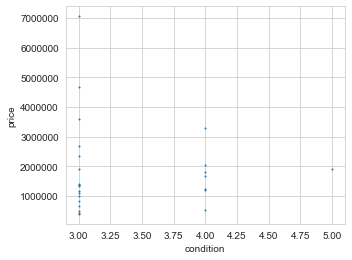

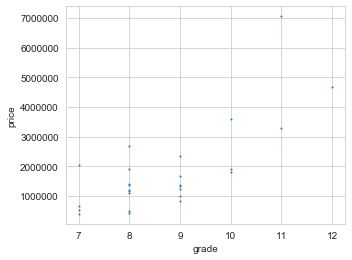

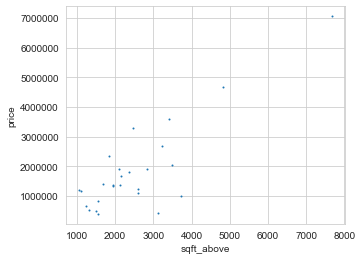

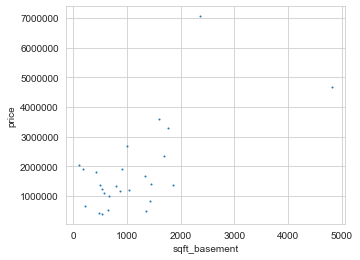

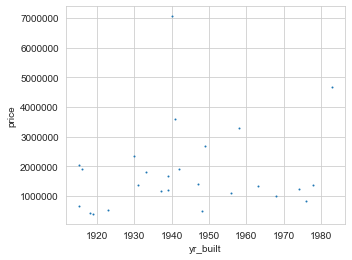

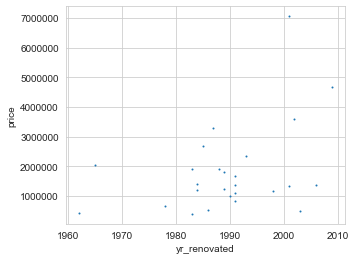

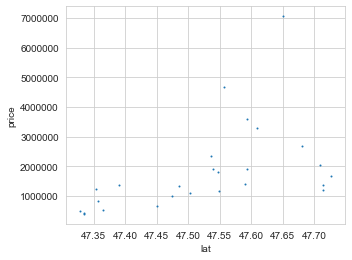

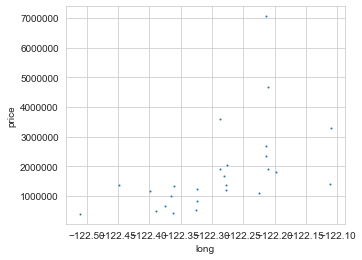

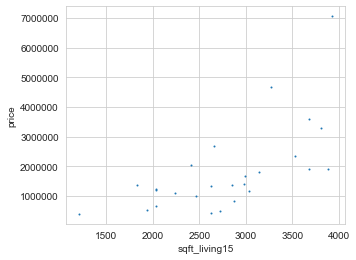

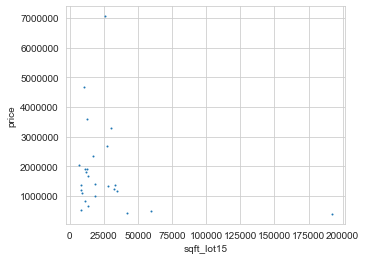

In [140]:
for cols in df:
    if cols != 'price':
        plt.figure()
        plt.scatter(x=df[cols], y = df['price'],s=1)
        plt.xlabel(cols)
        plt.ylabel('price')